## Interacting with the Spotify API
Spotify can be used as a data source for various data science projects. In this exercise, we will learn how to interact with the API of this social network. Spotipy is an open-source Python library that allows high-level use of the Spotify API.

## Step 1: Create a Spotify Developer Account
The first step is to create an application to be able to access Spotify API services. All the information can be found here.

Once you have logged in using your Spotify account, you can create the application to access the credentials needed to consume the API. You will need to fill in the following fields:
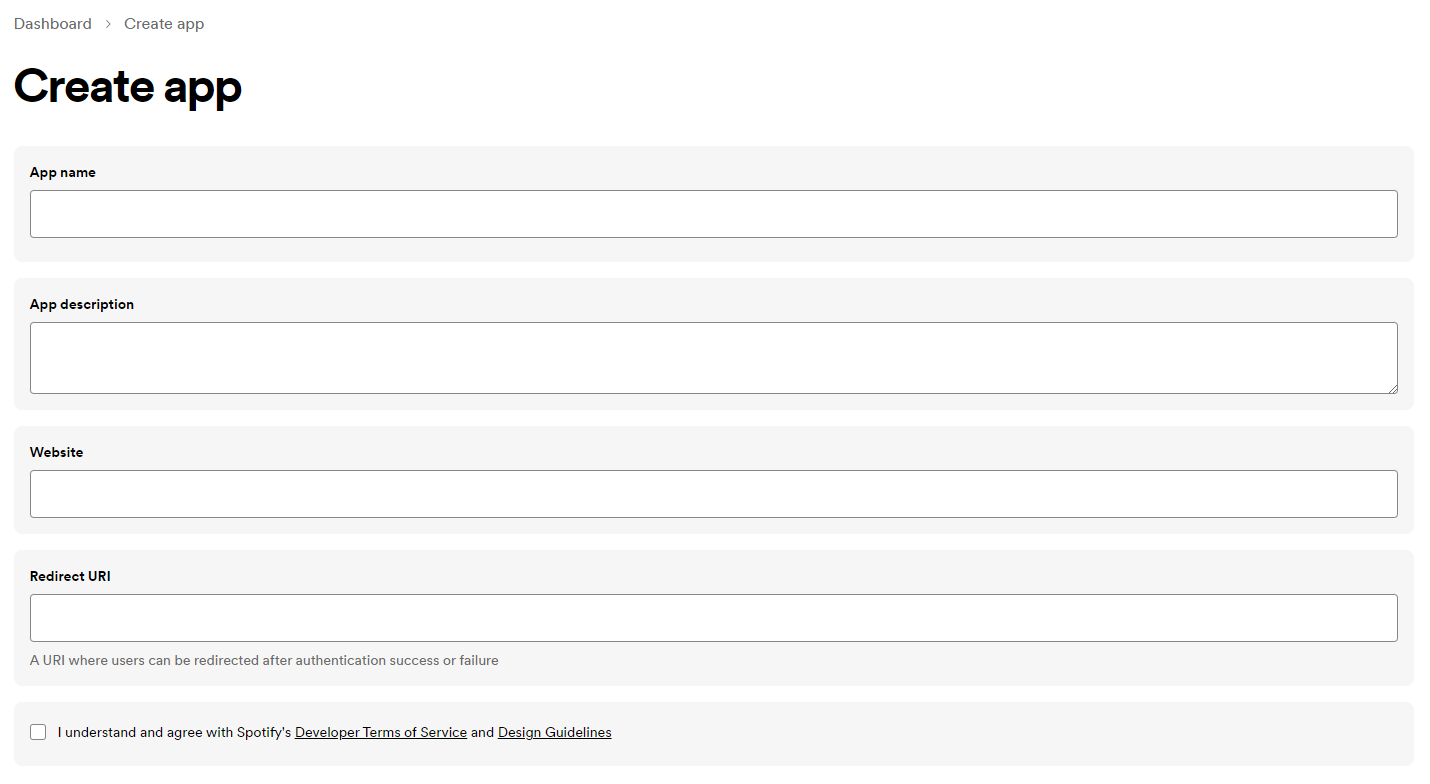

NOTE: As we are not going to use this API from any other web application, leave the Redirect URI field as http://localhost/.

Once you complete the form, you will have your application created. Next, in the settings section you can find your Client ID and Client Secret.

## Step 2: Initial configuration
Create an app.py file inside the ./src/ folder.
Install all the requirements from the requirements.txt file or just the required library.

In [3]:
# INSTALATIONS
! pip install requests python-dotenv pandas seaborn ipykernel nbformat
! pip freeze > requirements.txt
! pip install spotipy

Defaulting to user installation because normal site-packages is not writeable
  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
  Using cached nbformat-5.10.4-py3-none-any.whl (78 kB)
  Using cached fastjsonschema-2.20.0-py3-none-any.whl (23 kB)
  Using cached jsonschema-4.23.0-py3-none-any.whl (88 kB)
  Using cached attrs-24.2.0-py3-none-any.whl (63 kB)
  Using cached jsonschema_specifications-2023.12.1-py3-none-any.whl (18 kB)
  Using cached referencing-0.35.1-py3-none-any.whl (26 kB)
  Using cached rpds_py-0.20.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (354 kB)

[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip


## Step 3: Environment variables
Create a file .env on the root folder of the project.
Insert both the CLIENT_ID and CLIENT_SECRET in the file, for example:

In [4]:
"""""
CLIENT_ID="AAAAAAAAAAAABBBBBBBBBBBBCCCCCCCCCCCCC111111222222"
CLIENT_SECRET="DDDDDDDDDDDDDEEEEEEEEEEEEEEEEFFFFFFFFFFFFFF333333344444"
"""

'""\nCLIENT_ID="AAAAAAAAAAAABBBBBBBBBBBBCCCCCCCCCCCCC111111222222"\nCLIENT_SECRET="DDDDDDDDDDDDDEEEEEEEEEEEEEEEEFFFFFFFFFFFFFF333333344444"\n'

In [5]:
# Import libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt
# Aditionals for spotipy
import os
from dotenv import load_dotenv

## Step 4: Initialize Spotipy library
After downloading the library and loading the environment variables, we can start working by initiating the API connection:

In [6]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

load_dotenv()

True

In [7]:
# Connect
con = spotipy.Spotify(auth_manager= SpotifyClientCredentials(client_id= os.environ.get('CLIENT_ID'), client_secret= os.environ.get('CLIENT_SECRET')))

In [8]:
# Verify
con

## Step 5: Make API requests
In this case, I have chosen Drake. First, I get his ID by searching for his Spotify page and getting it from the URI. Now, I perform the search for his top 10 songs.

In [9]:
artist_id = "711MCceyCBcFnzjGY4Q7Un"

response = con.artist_top_tracks(artist_id)
if response:
  # We keep the "tracks" object of the answer
  tracks = response["tracks"]
  # We select, for each song, the data we are interested in and discard the rest
  tracks = [{k: (v/(1000*60))%60 if k == "duration_ms" else v for k, v in track.items() if k in ["name", "popularity", "duration_ms"]} for track in tracks]


In [10]:
# Show
tracks

[{'duration_ms': 3.502883333333333,
  'name': 'You Shook Me All Night Long',
  'popularity': 85},
 {'duration_ms': 4.258216666666667, 'name': 'Back In Black', 'popularity': 84},
 {'duration_ms': 4.881333333333333, 'name': 'Thunderstruck', 'popularity': 84},
 {'duration_ms': 3.473333333333333,
  'name': 'Highway to Hell',
  'popularity': 83},
 {'duration_ms': 3.5777666666666668, 'name': 'T.N.T.', 'popularity': 78},
 {'duration_ms': 5.204883333333333, 'name': 'Hells Bells', 'popularity': 75},
 {'duration_ms': 5.2904333333333335,
  'name': 'Shoot to Thrill',
  'popularity': 73},
 {'duration_ms': 3.86555,
  'name': 'Dirty Deeds Done Dirt Cheap',
  'popularity': 73},
 {'duration_ms': 5.020433333333333,
  'name': "It's a Long Way to the Top (If You Wanna Rock 'N' Roll)",
  'popularity': 71},
 {'duration_ms': 4.358433333333333,
  'name': 'Rock N Roll Train',
  'popularity': 68}]

## Step 6: Transform to Pandas DataFrame
Once we have modified the answer, we create the Pandas DataFrame from it:

In [11]:
import pandas as pd

df = pd.DataFrame([{k: v for k, v in d.items()} for d in tracks])
print(df.head(3))

   duration_ms                         name  popularity
0     3.502883  You Shook Me All Night Long          85
1     4.258217                Back In Black          84
2     4.881333                Thunderstruck          84


## Step 7: Analyze statistical relationship
A scatter plot is a good alternative to determine visually and graphically whether two variables may or may not be related to each other:

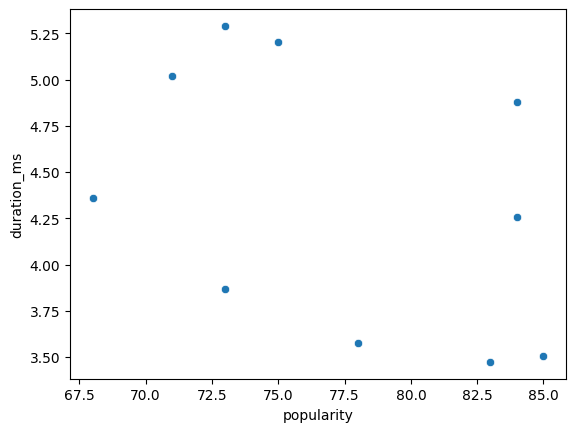

In [12]:
import seaborn as sns

scatter_plot = sns.scatterplot(data = df, x = "popularity", y = "duration_ms")
fig = scatter_plot.get_figure()
fig.savefig("scatter_plot.png")

AC/DC Artist Analysis:
We can see that the data is sparse and there is no correlation between popularity and song length.